In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# Section 1: Data Exploration
Upload the data and display the data columns/ number of rows/ variable types/ numeric statistics/ categorical variable frequencies.

In [3]:
# Upload the data and display the data columns
data_filename = 'nyc_data.csv' 
data = pd.read_csv(data_filename, 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'])
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [4]:
# Check the number of rows and variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846945 entries, 0 to 846944
Data columns (total 14 columns):
medallion             846945 non-null object
hack_license          846945 non-null object
vendor_id             846945 non-null object
rate_code             846945 non-null int64
store_and_fwd_flag    424577 non-null object
pickup_datetime       846945 non-null datetime64[ns]
dropoff_datetime      846945 non-null datetime64[ns]
passenger_count       846945 non-null int64
trip_time_in_secs     846945 non-null int64
trip_distance         846945 non-null float64
pickup_longitude      846945 non-null float64
pickup_latitude       846945 non-null float64
dropoff_longitude     846945 non-null float64
dropoff_latitude      846945 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 90.5+ MB


In [5]:
# Check if there are missing values in each variables
nnull = data.isnull()
nnull.sum()

# Comments:
# This is a pretty clean dataset. Only the variable "store_and_fwd_flag" has around 50% missing values.
# We could leave as it is since it's not a key feature we'll use in this case.

medallion                  0
hack_license               0
vendor_id                  0
rate_code                  0
store_and_fwd_flag    422368
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_time_in_secs          0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
dtype: int64

In [6]:
# Check the numeric statistics
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


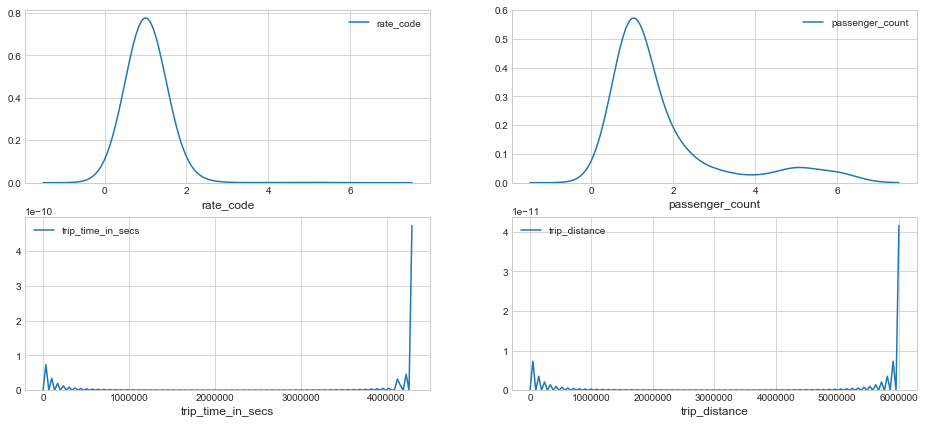

In [8]:
# Plot the distributions of 'rate_code','passenger_count','trip_time_in_secs','trip_distance'
import seaborn as sns
dist = data[['rate_code','passenger_count','trip_time_in_secs','trip_distance']]
var = dist.columns.values
i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2, 2, figsize = (16, 7))
for feature in var:
    i += 1
    plt.subplot(2, 2, i)
    sns.kdeplot(data[feature], bw = 0.5)
    plt.xlabel(feature, fontsize = 12)
    
# Comments:
# The distribution plots clearly tell that:
# 1) Most of the rate_code is 1, which is "standard rate" according to the data dictionary;
# 2) The majority of the passenger_count is also 1 - there was only one passenger in the vehicle in most cases
# 3) There are outliers to be removed in the trip_time variable and trip_distance variable. 

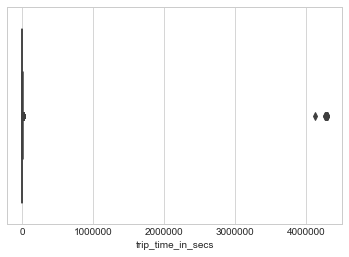

In [9]:
# Detect the outliers in trip_time column
sns.boxplot(x = data['trip_time_in_secs'])

In [10]:
# Remove the trip_time records of over 4,000,000 seconds
data2 = data[(data['trip_time_in_secs']) < 4000000].reset_index(drop=True)

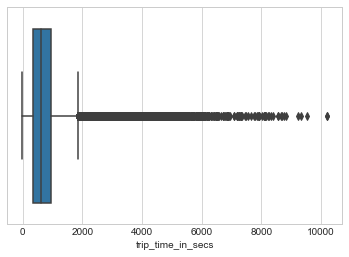

In [11]:
# Check the distribution again
sns.boxplot(x = data2['trip_time_in_secs'])

# Comments:
# The new distribution tells that most of the trip_time is below 2,000 secs (33.33 mins)
# One point is over 10,000 secs (2.78 hrs), but it's within the reasonable range due to traffic jams in the City.

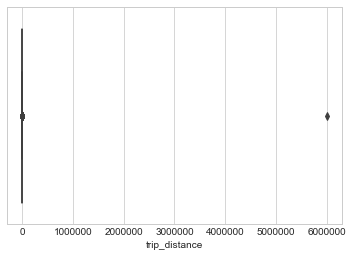

In [12]:
# Then, detect the outliers in trip_distance column
sns.boxplot(x = data['trip_distance'])

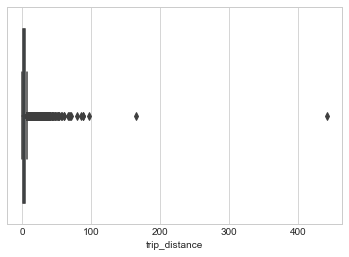

In [13]:
# Remove the trip_distance records of over 6,000,000 miles
data2 = data2[(data2['trip_distance']) < 6000000].reset_index(drop=True)
# And check the distribution
sns.boxplot(x = data2['trip_distance'])

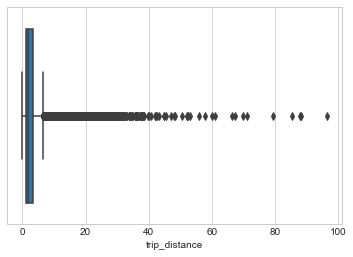

In [14]:
# Remove the values over 100 miles
data2 = data2[(data2['trip_distance']) < 100].reset_index(drop=True)
# And then check the distribution again
sns.boxplot(x = data2['trip_distance'])

# Comments:
# Most of the trips were shorter than 5 miles, while some of them were longer up to 100 miles.
# *** A more detailed exploration of trip distance please refer to Section C. ***

In [15]:
# After removing the outliers, check the shape of the new dataset, data2
data2.shape

(846930, 14)

In [16]:
# Next, for categorical variables, check the frequencies of "vendor_id", "rate_code", and "store_and_fwd_flag"
vendor = data2['vendor_id'].value_counts()
vendor_df = pd.DataFrame({'Class' : vendor.index, 'Values' : vendor.values})
vendor_df.columns = ['vendor_id', 'count']
vendor_df.head()

# Comments:
# Although CMT count is 0.57% greater than VTS count, 
# the two vendors are surprisingly with almost euqal shares of the NYC yellow taxi market.

,vendor_id,count
0,CMT,424663
1,VTS,422267


In [17]:
# Check the frequency of different "rate_codes"
rate_code = data2['rate_code'].value_counts()
rate_code_df = pd.DataFrame({'Class' : rate_code.index, 'Values' : rate_code.values})
rate_code_df.columns = ['rate_code', 'count']
rate_code_df.head()

# Comments:
# The majority of the trips in the dataset is "standard rate"(rate_code as 1), 
# then the trips to JFK airport come the second (rate_code as 2),
# and the least group are the trips to Newark (rate_code as 3).

,rate_code,count
0,1,830014
1,2,14732
2,5,1397
3,4,533
4,3,121


In [18]:
# Check the frequency of "store_and_fwd_flag"
memory = data2['store_and_fwd_flag'].value_counts()
memory_df = pd.DataFrame({'Class' : memory.index, 'Values' : memory.values})
memory_df.columns = ['store_and_fwd', 'count']
memory_df.head()

# Comments:
# Besides the missing values, the majority of the taxis are not a store and forward trip,
# meaning that these vehicles have a connection to the server.

,store_and_fwd,count
0,N,414586
1,Y,9976


# Section 2: Scatter Plot of Pickup Locations
Display a scatter plot of pick up locations. For which vendor is it easiest to find a cab?

In [21]:
# Count the pickup locations for each vendor
pickup = data2['pickup_longitude'].value_counts()
pickup_df = pd.DataFrame({'Class' : vendor.index, 'Values' : vendor.values})
pickup_df.columns = ['pickup_longitude', 'count']
pickup_df.head()

# Answer:
# CMT is the vendor which is easier to be found, becasue it has more pickup locations than the vendor VTS.

# Below codes in Section 2 are just to comfirm the answer using scatterplot.

,pickup_longitude,count
0,CMT,424663
1,VTS,422267


In [157]:
# To compare the pickup location distribution of the two vendors, first split them into two subsets by vendors
CMT = data2[(data2['vendor_id']) == 'CMT'].reset_index(drop=True)
VTS = data2[(data2['vendor_id']) == 'VTS'].reset_index(drop=True)

In [158]:
# Get the pickup locations of CMT
CMT_p_lng = CMT.pickup_longitude
CMT_p_lat = CMT.pickup_latitude
CMT_p_lng.head()

0   -73.969955
1   -73.999413
2   -74.006554
3   -73.972473
4   -74.007263
Name: pickup_longitude, dtype: float64

In [159]:
# Get the pickup locations of VTS
VTS_p_lng = VTS.pickup_longitude
VTS_p_lat = VTS.pickup_latitude
VTS_p_lng.head()

0   -73.955925
1   -74.005501
2   -73.991432
3   -73.966225
4   -73.955238
Name: pickup_longitude, dtype: float64

In [160]:
# Write a function to get the coordinates of points in pixels from geographical coordinates
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

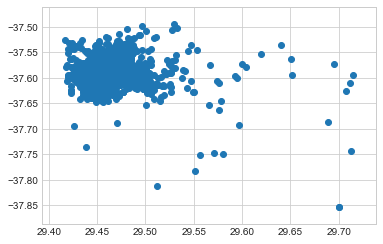

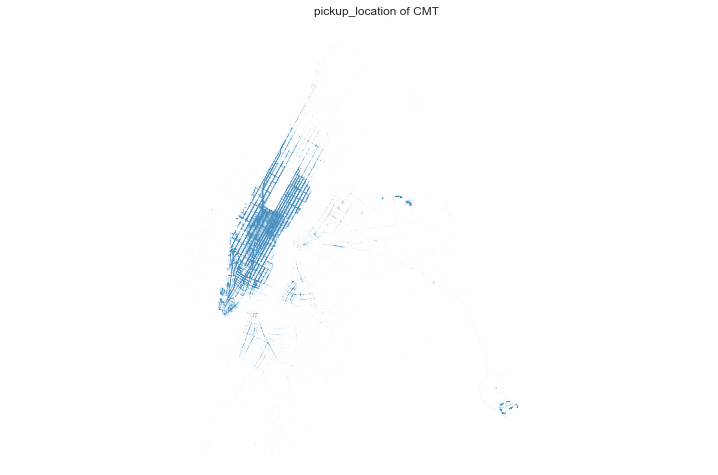

In [161]:
# Draw the first scatter plot: the pickup locations of CMT
px1, py1 = lat_lng_to_pixels(CMT_p_lat, CMT_p_lng)
plt.scatter(px1, py1)
plt.figure(figsize=(12, 8))
plt.scatter(px1, py1, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of CMT')
plt.axis('off')

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

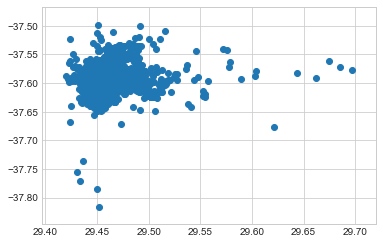

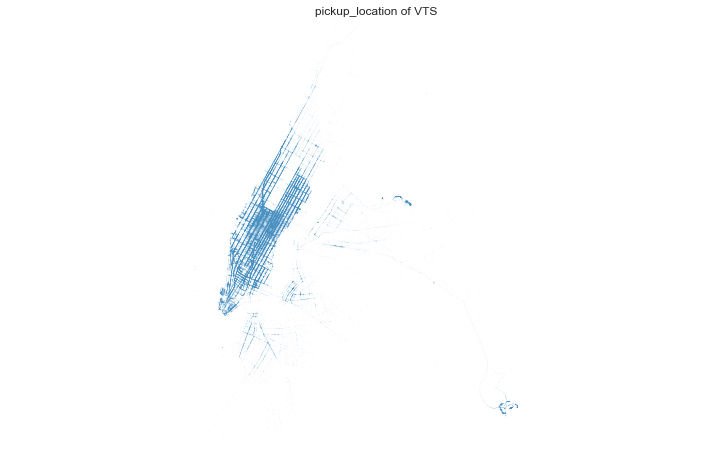

In [162]:
# Draw the second scatter plot: the pickup locations of VTS
px2, py2 = lat_lng_to_pixels(VTS_p_lat, VTS_p_lng)
plt.scatter(px2, py2)
plt.figure(figsize=(12, 8))
plt.scatter(px2, py2, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of VTS')
plt.axis('off')

# Comments:
# Comparing the plots of CMT and VTS, we found that the pickup locations of CMT are more distributed than VTS.
# Thus, we conclude that it is easier for users to find a cab of vendor CMT.

In [163]:
# To further compare the distributions by time period, first split the "pickup_daytime" to "p_date" and "p_time"
data2[['p_date','p_time']] = data2.pickup_datetime.astype(str).str.split(' ', expand=True)
data2.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,p_date,p_time
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,2013-01-01,00:00:00
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722,2013-01-01,00:05:00
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392,2013-01-01,00:05:52
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085,2013-01-01,00:06:00
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597,2013-01-01,00:06:00


In [164]:
# Separate the p_time to "daytime" (8am-6pm) and "nighttime" (0am-8am & 6pm-0pm)
# in order to compare if the distributions of CMT and VTS are different during different time period
daytime = data2[data2['p_time'].between('00:08:00', '18:00:00')].reset_index(drop=True)
nighttime = data2[(data2['p_time'] > '18:00:00') | (data2['p_time'] < '00:08:00')].reset_index(drop=True)

In [165]:
# Further split the daytime and nighttime by vendors
CMT_day = daytime[(daytime['vendor_id']) == 'CMT'].reset_index(drop=True)
VTS_day = daytime[(daytime['vendor_id']) == 'VTS'].reset_index(drop=True)
CMT_night = nighttime[(nighttime['vendor_id']) == 'CMT'].reset_index(drop=True)
VTS_night = nighttime[(nighttime['vendor_id']) == 'VTS'].reset_index(drop=True)

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

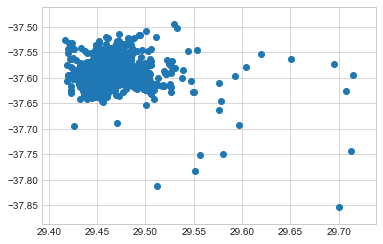

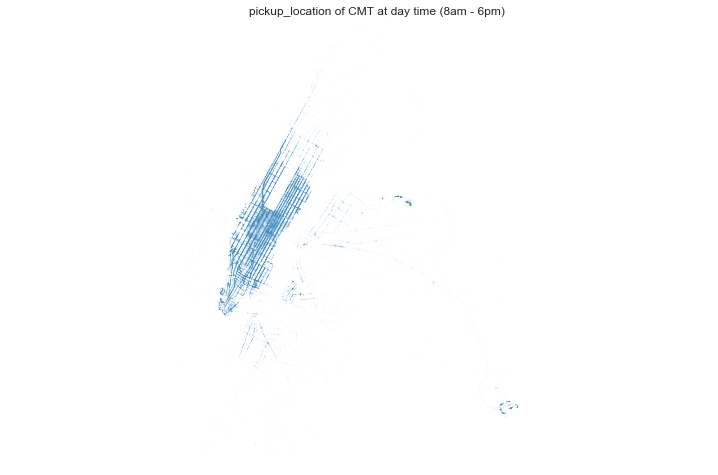

In [166]:
# For daytime,
# plot the distribution of CMT 
CMT_day_p_lng = CMT_day.pickup_longitude
CMT_day_p_lat = CMT_day.pickup_latitude
px3, py3 = lat_lng_to_pixels(CMT_day_p_lat, CMT_day_p_lng)
plt.scatter(px3, py3)
plt.figure(figsize=(12, 8))
plt.scatter(px3, py3, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of CMT at day time (8am - 6pm)')
plt.axis('off')

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

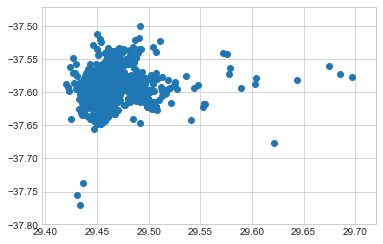

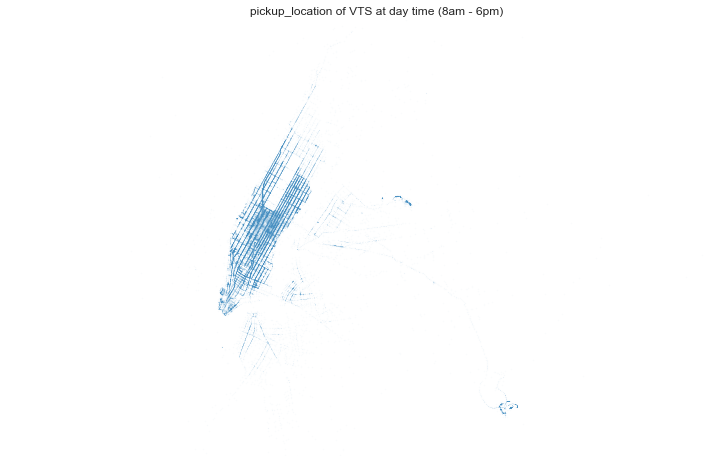

In [167]:
# Then, plot the distribution of VTS
VTS_day_p_lng = VTS_day.pickup_longitude
VTS_day_p_lat = VTS_day.pickup_latitude
px4, py4 = lat_lng_to_pixels(VTS_day_p_lat, VTS_day_p_lng)
plt.scatter(px4, py4)
plt.figure(figsize=(12, 8))
plt.scatter(px4, py4, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of VTS at day time (8am - 6pm)')
plt.axis('off')

# Comments:
# During 8am-6pm, it's equally easy to find a cab of both vendors in Manhattan area. 
# But it's easier to find a CMS cab outside of Manhattan because of the more distributed pickup locations of CMS.

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

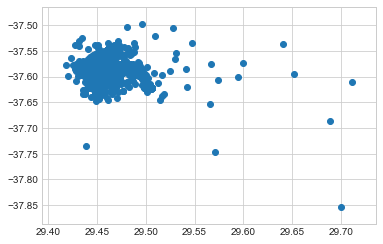

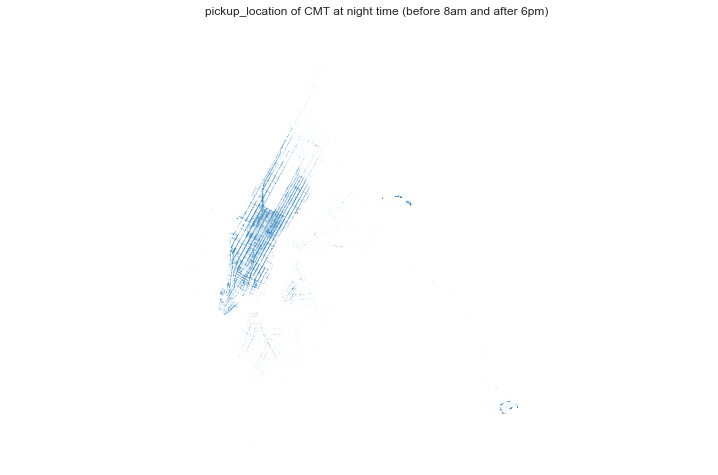

In [168]:
# During night time,
# plot the distribution of CMT 
CMT_night_p_lng = CMT_night.pickup_longitude
CMT_night_p_lat = CMT_night.pickup_latitude
px5, py5 = lat_lng_to_pixels(CMT_night_p_lat, CMT_night_p_lng)
plt.scatter(px5, py5)
plt.figure(figsize=(12, 8))
plt.scatter(px5, py5, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of CMT at night time (before 8am and after 6pm)')
plt.axis('off')

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

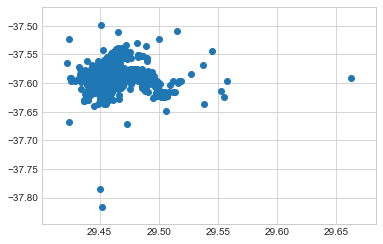

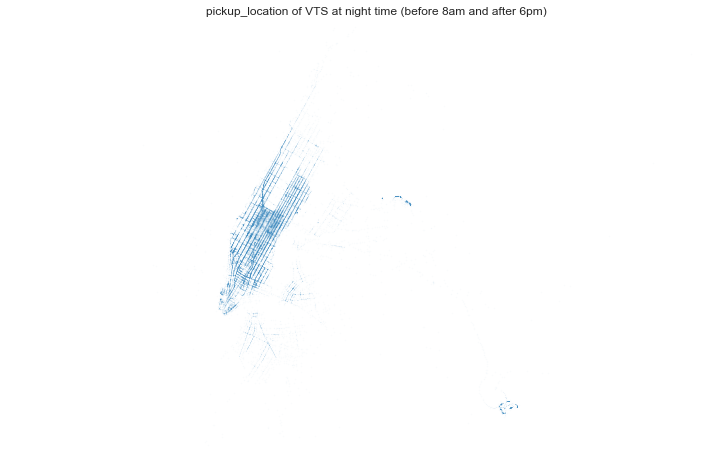

In [169]:
# Then, plot the distribution of VTS
VTS_night_p_lng = VTS_night.pickup_longitude
VTS_night_p_lat = VTS_night.pickup_latitude
px6, py6 = lat_lng_to_pixels(VTS_night_p_lat, VTS_night_p_lng)
plt.scatter(px6, py6)
plt.figure(figsize=(12, 8))
plt.scatter(px6, py6, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of VTS at night time (before 8am and after 6pm)')
plt.axis('off')

# Comments:
# Similar to the findings during daytime,
# for night time taxi operations, it's equally easy to find a cab of both vendors in Manhattan area. 
# But it's easier to find a CMS cab outside of Manhattan because of the more distributed pickup locations.

# Section 3: Histgram of Trip Distances
Displayed a histogram of trip distances. What is the most common trip distance?

In [182]:
# Create a bin arrary that is evenly separated to 30 bins within numbers from 0 to 10
bin_array = np.linspace(start=0., stop=10., num=30)
bin_array

array([  0.        ,   0.34482759,   0.68965517,   1.03448276,
         1.37931034,   1.72413793,   2.06896552,   2.4137931 ,
         2.75862069,   3.10344828,   3.44827586,   3.79310345,
         4.13793103,   4.48275862,   4.82758621,   5.17241379,
         5.51724138,   5.86206897,   6.20689655,   6.55172414,
         6.89655172,   7.24137931,   7.5862069 ,   7.93103448,
         8.27586207,   8.62068966,   8.96551724,   9.31034483,
         9.65517241,  10.        ])

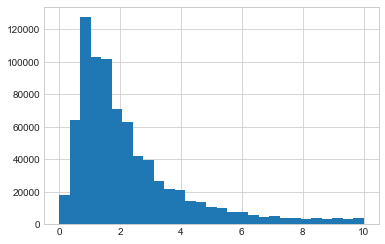

In [183]:
# Plot the histogram of the trip distance distribution
data2.trip_distance.hist(bins=bin_array)

# Yet, from this plot, we could not directly tell which interval is the most common trip distance
# Thus, I would use bins='auto' instead to plot the histogram

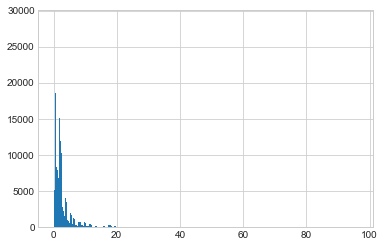

In [186]:
data2.trip_distance.hist(bins='auto')

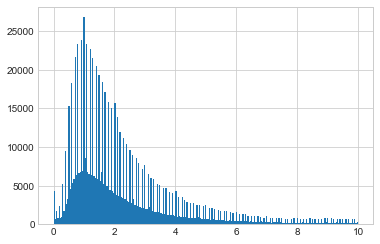

In [188]:
# Zoom in to see the distribution within the less than 10 miles trips
data3 = data2[(data2['trip_distance']) < 10].reset_index(drop=True)
data3.trip_distance.hist(bins='auto')

# Comments:
# From this graph, we could tell that for the yellow taxi market, NYC is a city full of short distance ride.
# The most common trip distance here is between 0.5~2miles.

# Section 4: Histogram of Total Fares

In [190]:
# Load the fare data and have a check
fare = pd.read_csv('nyc_fare.csv')
fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [194]:
# Check the info of the fare data
fare.info()

# This is a pretty clean dataset with 846,945 rows and 11 columns, and no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846945 entries, 0 to 846944
Data columns (total 11 columns):
medallion          846945 non-null object
hack_license       846945 non-null object
vendor_id          846945 non-null object
pickup_datetime    846945 non-null object
payment_type       846945 non-null object
fare_amount        846945 non-null float64
surcharge          846945 non-null float64
mta_tax            846945 non-null float64
tip_amount         846945 non-null float64
tolls_amount       846945 non-null float64
total_amount       846945 non-null float64
dtypes: float64(6), object(5)
memory usage: 71.1+ MB


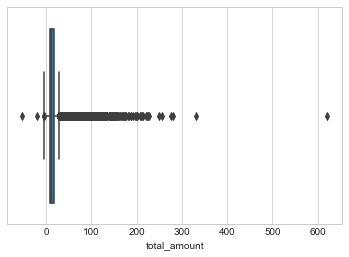

In [200]:
# Detect the potential outliers of the total_amount
sns.boxplot(x = fare['total_amount'])

In [208]:
# Remove the outliers and only obtain the values between 0~40
fare2 = fare[(fare.total_amount>0) & (fare.total_amount<40)]
fare2.shape

(808042, 11)

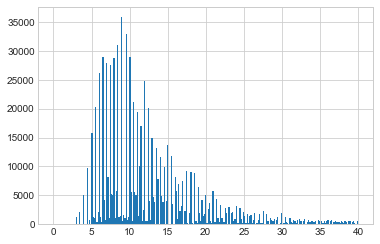

In [209]:
# Plot a histogram of the filtered total_amount
fare2.total_amount.hist(bins='auto')

# Comments:
# 1) From the graph, we could tell that the majority of the trip total_amount is between 5 to 10 dollars.
# 2) This finding makes sense as the most common trips are short-distance trips in NYC (section 3, 0.5-2 miles).

# A personal note: 
# I may find the answer for why people couldn't just walk 
# given the short distance and the terrible traffic in the City -- because it's just 5-10 dollars.
# I know there's no causation here. I'm just guessing.)

# Section 5: Filtering Long Trips

In [175]:
# Use the boolean indexing methods to filter the distances over 100 miles
long_rides = data.loc[data.trip_distance > 100]
long_rides

# Comments:
# In the nyc_data, there are four unusual long trips of over 100 miles trip distance.

# However, when we take a closer look at each record:
# 1) The record with over 6,000,000 miles distance is defnitely an outlier given NYC is a small city.
# 2) Also, further cleaning may need for the record of 442 miles distance, because its trip_time is only 1 second.
# 3) The record with 181 miles distance and 4,290,965 secs (over 49 days) trip time is impossible too.
# 4) Therefore, only one of the four records is reasonable: the 164 miles trip with 6,640 secs (1.8 hrs).

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
504497,7237EC7ABD6114EDDC87A3AA846F8418,D52502537E2DF62C9BFFECF5A387E7E9,CMT,1,N,2013-08-02 11:22:31,2013-08-02 11:33:03,1,631,6005123.0,-73.997467,40.736397,-73.991882,40.764629
507107,50DA72F510E2F84A42712E13744FAC7B,EA9D03A766C1D32A6668FFF0C1EB4E4B,CMT,1,N,2013-08-04 18:42:17,2013-08-04 20:37:19,3,4290965,181.8,-73.978020,40.765167,-73.815041,40.730076
548988,A978A0AAE9B2CFEE310FACD97A09C319,CE56A27F53ABF411094B6CD708BFBA96,CMT,1,N,2013-08-24 17:03:27,2013-08-24 17:03:29,1,1,442.0,-73.993896,40.702644,-73.993874,40.702637
558665,5A5C516A820FE476E9D3E14101B669AC,C24585AA866FC76A4E09A05F55DC7E54,CMT,2,N,2013-08-29 10:01:40,2013-08-29 11:52:20,1,6640,164.4,-73.791534,40.661026,-73.983734,40.765778
